This notebook prepares the data (in .csv) from bulk_export_processed by data cleansing and preprocessing.

In [1]:
# import library
import pandas as pd
import numpy as np
# import scipy.stats
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns
import math

pd.set_option('display.max_columns', None,'display.max_row', None)

default_figsize = (15,5)

In [2]:
# import category information
df_category_groups = pd.read_csv("category_groups_processed.csv")
df_funding_rounds = pd.read_csv("funding_rounds_processed.csv")
# df_org_parents = pd.read_csv("org_parents_processed.csv")

In [3]:
# df_org_parents.info()
# df_org_parents.describe
# df_category_groups.head()

In [4]:
# count the values of categories
category_count_series = df_category_groups['category_groups_list'].value_counts()
print(category_count_series)

Other                                                                                          33
Health Care                                                                                    29
Transportation                                                                                 29
Sports                                                                                         26
Commerce and Shopping                                                                          25
Software                                                                                       24
Community and Lifestyle                                                                        22
Real Estate                                                                                    22
Food and Beverage                                                                              22
Sales and Marketing                                                                            21
Professional Service

In [5]:
# use keyword to search for relevant categories
fintech_searchfor = ['Financial Services']
tech_searchfor = fintech_searchfor + ['Software', 'Hardware', 'Internet Services', 'Information Technology',
'Science and Engineering', 'Sustainability', 'Energy', 'Privacy and Security', 'Data and Analytics',
'Messaging and Telecommunications', 'Artificial Intelligence', 'Mobile', 'Platform', 'Biotechnology',
'Apps', 'Navigation and Mapping']

# categories can be formed from one or more above elementary keywords
df_fintech_category = df_category_groups[df_category_groups['category_groups_list'].str.contains('|'.join(fintech_searchfor))]
df_tech_category = df_category_groups[df_category_groups['category_groups_list'].str.contains('|'.join(tech_searchfor))]

# tech_category = {'Software', 'Hardware', ...} # incomplete
# df_fintech_category = df_category_groups[df_category_groups['category_groups_list'].isin(fintech_category)]


# print(df_fintech_category)

In [6]:
# print(df_tech_category)

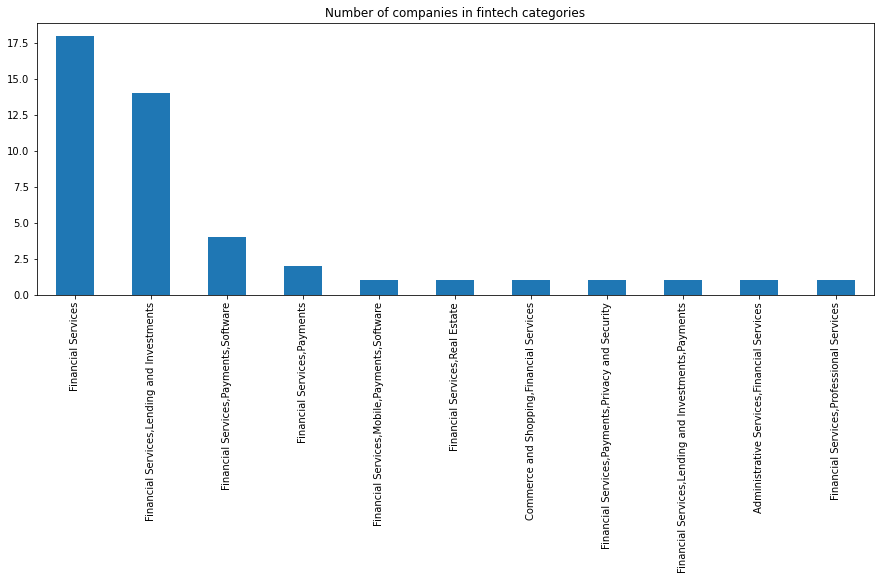

In [7]:
# a primitive plot, will improve laterrr
fig, ax = plt.subplots()

df_fintech_category['category_groups_list'].value_counts().plot(kind='bar', figsize=default_figsize)

ax.set_title('Number of companies in fintech categories')
plt.show()

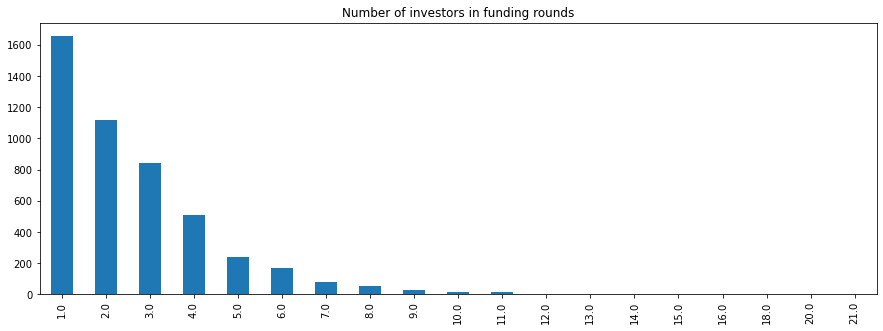

In [27]:
fig, ax = plt.subplots()

investor_count = df_funding_rounds['investor_count'].value_counts().sort_index()
investor_count.plot.bar(figsize=default_figsize)

# ax.set_xlim(1, 10) # bugged, idk why
ax.set_title('Number of investors in funding rounds')
plt.show()

In [9]:
investment_type_series = df_funding_rounds['investment_type'].value_counts()
print(investment_type_series)

series_a                 1708
series_b                 1021
seed                      955
series_unknown            547
angel                     531
series_c                  494
series_d                  198
debt_financing             86
series_e                   62
private_equity             40
post_ipo_equity            38
series_f                   28
undisclosed                28
pre_seed                   11
grant                      10
post_ipo_debt               6
convertible_note            3
corporate_round             1
secondary_market            1
series_i                    1
non_equity_assistance       1
series_g                    1
Name: investment_type, dtype: int64


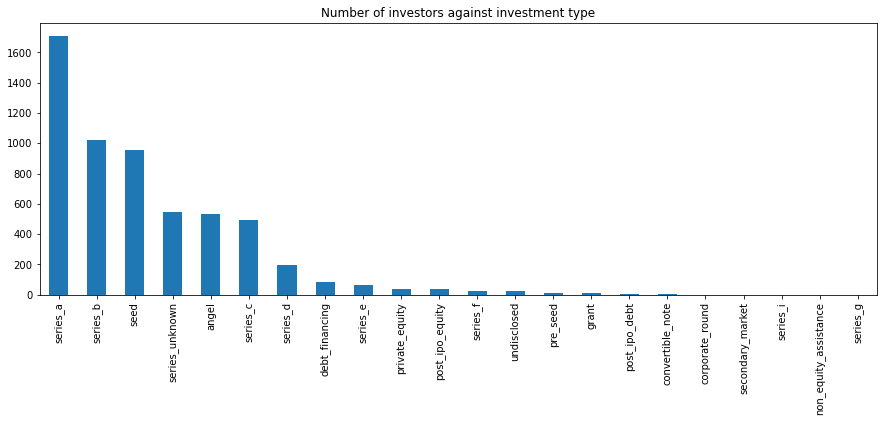

In [10]:
# to be improved: group insignificant investment types
fig, ax = plt.subplots()

# investor_count = df_funding_rounds['investor_count'].value_counts()
investment_type_series.plot.bar(figsize=default_figsize)

ax.set_title('Number of investors against investment type')
plt.show()